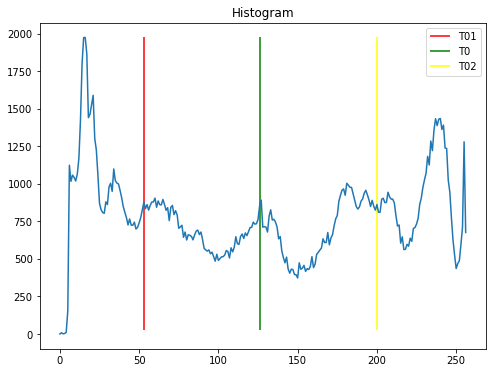

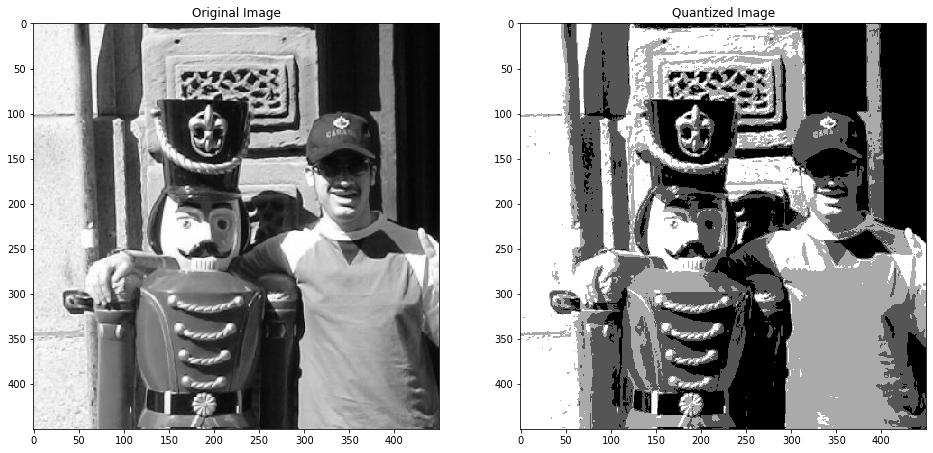

In [120]:
"""
MultiMedia Homework 3
-----------------------------
Author : Maryam Saeedmehr
Std NO.: 9629373
"""

# Question 1 : Median Cut

import cv2 as cv # for reading image
import numpy as np # some mathematic calculation
import matplotlib.pyplot as plt # plot results


# Histogram Function of HW2------------------------------------
def histogram(image):
    """
    This function will calculate histogram of
    an input image.
    """
    Histogram = [0]*257
    [Row, Column] = image.shape
    for row in range(Row):
        for column in range(Column):
            Histogram[image[row][column] + 1] = Histogram[image[row][column] + 1] + 1
        
    return Histogram
    
    
# Hist_Median function----------------------------------------
def hist_median(image):
    # create a copy of original image
    image_copy = np.copy(image)

    hist = histogram(image)
    
    [Row, Column] = image.shape
    imageSize = Row * Column
    
    # find k-means-----------------------------
    sum_ = 0
    k_means = []
    k = 1
    for i in range(257):
        sum_ += hist[i]
        if sum_ >= k*imageSize//4:
            k_means.append(i)
            k += 1
            if k == 4:
                break
                
    # Quantization-----------------------------
    for i in range(Row):
        for j in range(Column):
            if image[i][j] < k_means[0]:
                image_copy[i][j] = 0
            elif image[i][j] >= k_means[0] and image[i][j] < k_means[1]:
                image_copy[i][j] = 1
            elif image[i][j] >= k_means[1] and image[i][j] < k_means[2]:
                image_copy[i][j] = 2
            else :
                image_copy[i][j] = 3
    
    
    # Plot Histogram and k-means---------------
    plt.figure(figsize=(8, 6))
    plt.title('Histogram')
    plt.plot(hist)
    plt.vlines(k_means[0], ymin=25, ymax=max(hist), colors='red', label='T01')
    plt.vlines(k_means[1], ymin=25, ymax=max(hist), colors='green', label='T0')
    plt.vlines(k_means[2], ymin=25, ymax=max(hist), colors='yellow', label='T02')
    plt.legend()
    
    # Plot Quantized image---------------------
    plt.figure(figsize=(16, 12))
    plt.subplot(121)
    plt.title('Original Image')
    plt.imshow(image, cmap='gray')
    plt.subplot(122)
    plt.title('Quantized Image')
    plt.imshow(image_copy, cmap='gray')
    
# ------------------------------------------------------------
# Test the function
img = cv.imread('Hi.tif', 0)
hist_median(img)

PSNR = 25.121692931991927
Zero coefficients = 89.65595183133271 %


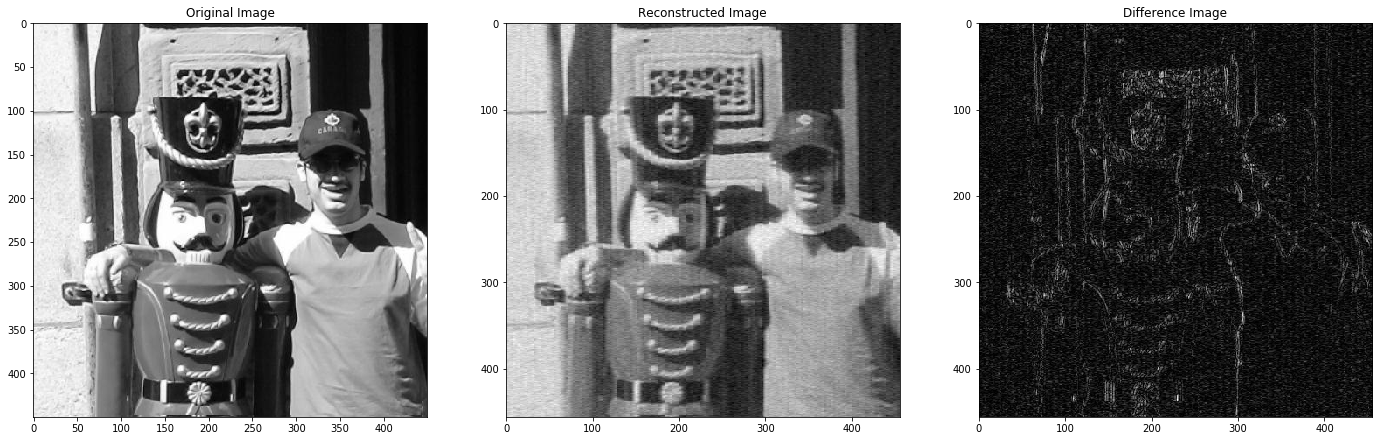

In [21]:
# Question 2 : DCT on k*k blocks with threshold=t

from scipy.fftpack import dct, idct
import cv2 as cv # for reading image
import numpy as np # some mathematic calculation
import matplotlib.pyplot as plt # plot results

# implement 2D DCT--------------------
def dct2(a):
    return dct(dct(a.T, norm='ortho').T, norm='ortho')

# implement 2D IDCT-------------------
def idct2(a):
    return idct(idct(a.T, norm='ortho').T, norm='ortho')

# PSNR Function-----------------------
def PSNR(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    if(mse == 0): 
        """
        MSE is zero means no noise is present in the signal
        Therefore PSNR have no importance. 
        """
        return 100
    max_pixel = 255.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse)) 
    return psnr

# DCT---------------------------------------------------------
def HW3_dct(I, K, t):
    if K not in range(4, 33):
        print('Block size should be in range [4, 32]')
        return -1
    
    [Row, Column] = I.shape
    J = cv.resize(I,(Row+(K-Row%K) , Column+(K-Column%K)))
    [Row, Column] = J.shape
    
    # DCT Coefficient calculation---------------------
    dct_coeff = dct2(J.reshape(Row//K*Column//K, K, K))
          
    # threshold appliance-----------------------------
    dct_coeff[abs(dct_coeff) < t] = 0
                
    # Reconstructing the image by idct2---------------
    rebuilt_image = idct2(dct_coeff).reshape(Row,Column)
    difference = abs(J - rebuilt_image)
    
    # PSNR--------------------------------------------
    psnr = PSNR(J, rebuilt_image)
    print('PSNR = {}'.format(psnr))
    
    # zero Coefficient count--------------------------
    zero_count = np.count_nonzero(dct_coeff==0)
    zero_percent = (zero_count/(Row*Column))*100
    print('Zero coefficients = {} %'.format(zero_percent))
    
    # plot the rebuilt, original and difference of those---
    plt.figure(figsize=(24, 18))
    plt.subplot(131)
    plt.title('Original Image')
    plt.imshow(I, cmap='gray')
    plt.subplot(132)
    plt.title('Reconstructed Image')
    plt.imshow(rebuilt_image, cmap='gray')
    plt.subplot(133)
    plt.title('Difference Image')
    plt.imshow(difference, cmap='gray')
    
# ------------------------------------------------------------
# Test the function
I = cv.imread('Hi.tif', 0)
K = 8
t = 50
HW3_dct(I, K, t)